In [9]:

from sklearn.datasets import fetch_olivetti_faces

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import  GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = fetch_olivetti_faces()

X,y = data.data, data.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [12]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=False, cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

PCA + Naive Bayes Classification Report


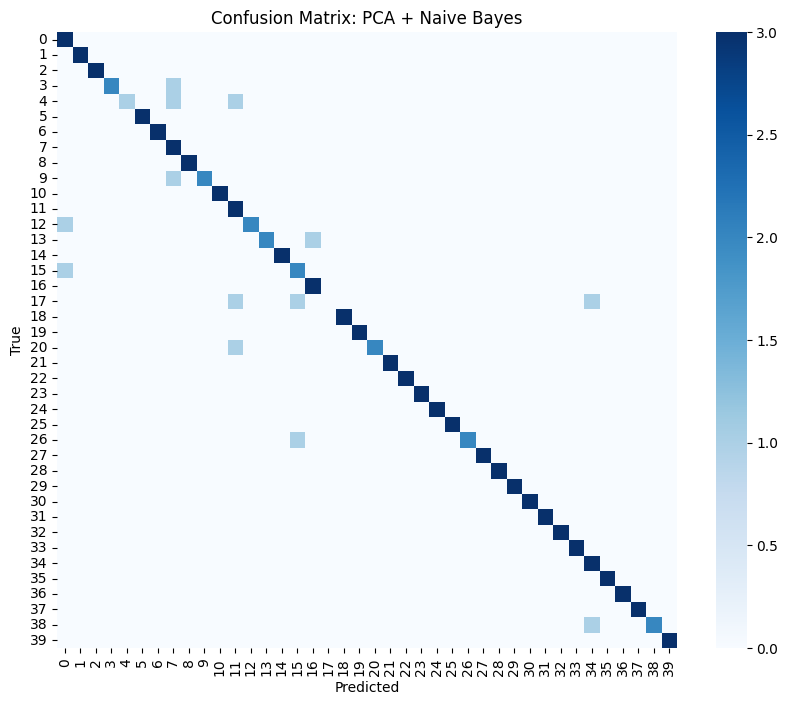

Accuracy (PCA + NB): 89.17
              precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.50      1.00      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       0.50      1.00      0.67         3
          12       1.00      0.67      0.80         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.50      0.67      0.57         3
          16       0.75      1.00      0.86         3


c:\Users\Ajith Kumar\Desktop\ML Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ajith Kumar\Desktop\ML Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Ajith Kumar\Desktop\ML Project\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

In [13]:
pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

nb_pca = GaussianNB()
nb_pca.fit(X_train_pca, y_train)
y_pred_pca = nb_pca.predict(X_test_pca)
                
print("PCA + Naive Bayes Classification Report")

plot_confusion_matrix(y_test, y_pred_pca, "Confusion Matrix: PCA + Naive Bayes")

acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Accuracy (PCA + NB): {acc_pca * 100:.2f}")

print(classification_report(y_test, y_pred_pca))

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


LDA + Naive Bayes Classification Report
Accuracy (LDA + NB): 88.33


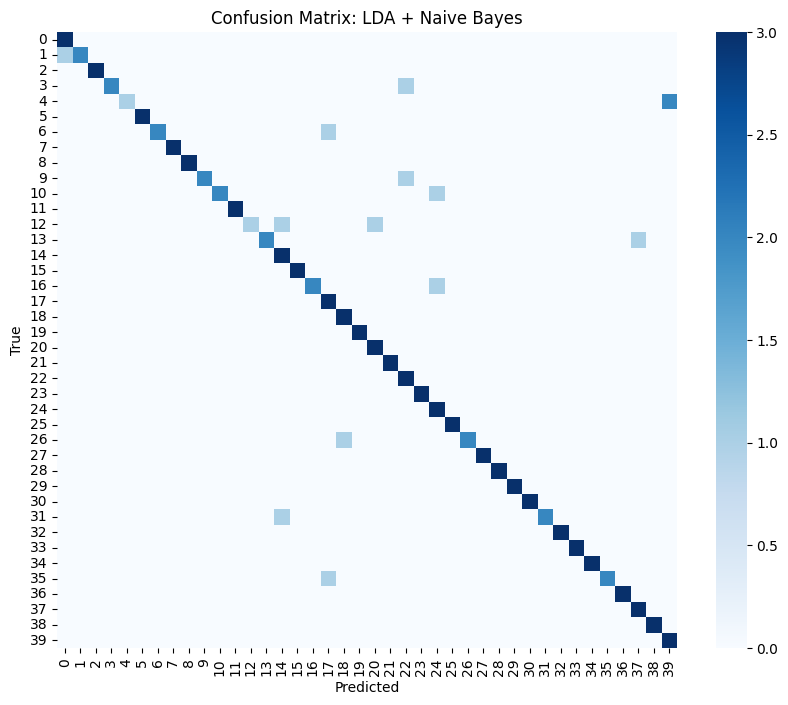

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3
           2       1.00      1.00      1.00         3
           3       1.00      0.67      0.80         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      0.67      0.80         3
          14       0.60      1.00      0.75         3
          15       1.00      1.00      1.00         3
          16       1.00      0.67      0.80         3
          17       0.60    

In [15]:
lda = LDA(n_components=39)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


nb_lda = GaussianNB()
nb_lda.fit(X_train_lda, y_train)
y_pred_lda = nb_lda.predict(X_test_lda)


print("LDA + Naive Bayes Classification Report")
acc_lda = accuracy_score(y_test, y_pred_lda)
print(f"Accuracy (LDA + NB): {acc_lda*100:.2f}")
plot_confusion_matrix(y_test, y_pred_lda, "Confusion Matrix: LDA + Naive Bayes")
print(classification_report(y_test, y_pred_lda))